<a href="https://colab.research.google.com/github/Priyanka1823/potato_disease_identifier/blob/main/disease_classifier(potato).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models,layers

In [ ]:
#  for using millions of images in your datset  use tf.data.dataset(not Dataframe)

In [ ]:
IMAGE_SIZE= 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(label_batch)

(32, 256, 256, 3)
[0 2 1 0 1 0 0 1 2 0 0 0 1 0 2 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0]
tf.Tensor([0 2 1 0 1 0 0 1 2 0 0 0 1 0 2 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0], shape=(32,), dtype=int32)


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [ ]:
#  to see the imgae of the dataset of a particular batch

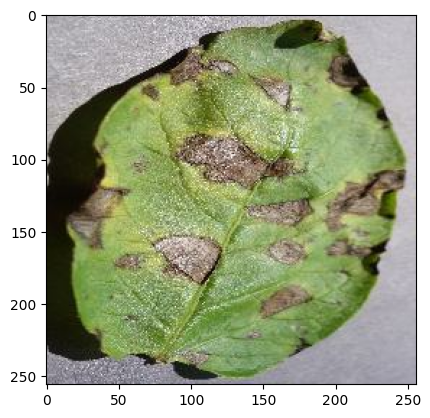

In [ ]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

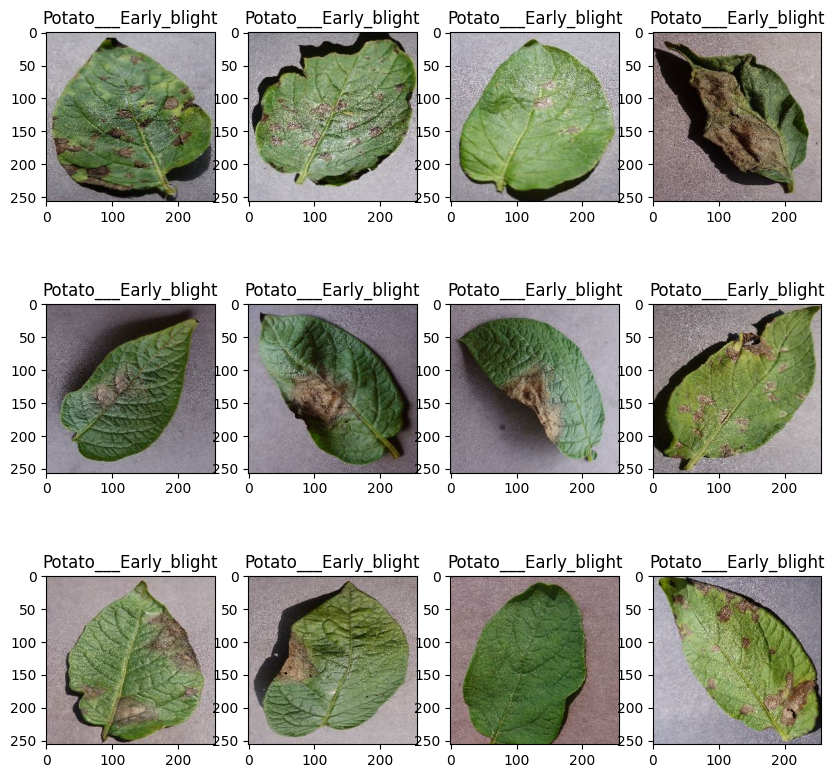

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
   for i in range(12):
       plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))
       plt.title(class_names[label_batch[0]])



In [ ]:
batch_size =image_batch.shape[0]

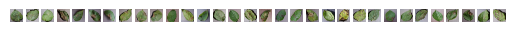

In [ ]:
for i in range(batch_size):
    plt.subplot(1, batch_size, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

In [ ]:
#  80% --> training
#  20% --> validation -> 10 %, testing -> 10%

In [ ]:
# train_test_split is used in statistical machine learning

In [ ]:
#  here we will use  (0.8 train )
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)

In [ ]:
#  temporary test
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
#  further split into test and validation
len(dataset)*0.1

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [ ]:
len(train_ds)
len(test_ds)
len(val_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split= 0.1, shuffle = True,shuffle_size = 10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)


    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds


In [ ]:
train_ds , val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255) #Scaling
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
n_classes = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = Sequential()

model.add(resize_and_rescale)
model.add(data_augmentation)

model.add(Conv2D(32,(3,3), activation='relu',input_shape = (input_shape)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(layers.Flatten()),
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(n_classes,activation='softmax'))


model.build(input_shape=input_shape)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy']
             )

In [ ]:
model.fit(
    train_ds,
    epochs = 20,
    batch_size= BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5041 - loss: 0.9148 - val_accuracy: 0.5938 - val_loss: 0.7576
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7322 - loss: 0.6387 - val_accuracy: 0.7656 - val_loss: 0.5896
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8653 - loss: 0.3618 - val_accuracy: 0.9062 - val_loss: 0.2343
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9209 - loss: 0.2007 - val_accuracy: 0.8073 - val_loss: 0.4789
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9125 - loss: 0.2388 - val_accuracy: 0.9740 - val_loss: 0.0698
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9608 - loss: 0.1075 - val_accuracy: 0.9531 - val_loss: 0.1337
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9648 - loss: 0.0981 - val_accuracy: 0.9479 - val_loss: 0.1004
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9714 - loss: 0.0850 - val_accuracy: 0.8698 - val_l

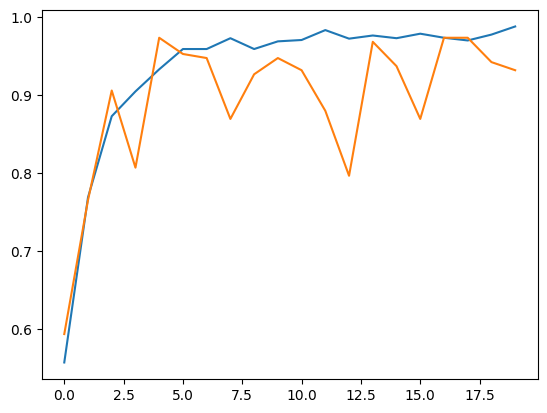

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
import numpy as np

Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[1.0000000e+00 1.7285664e-12 6.3191926e-27]
0


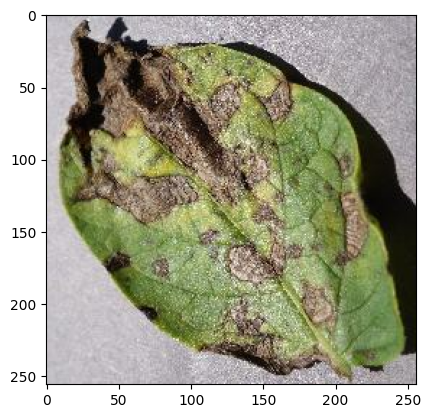

In [ ]:
for image_batch , label_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

    print(class_names[label_batch[0]])

    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])

    print(np.argmax(batch_prediction[0]))





In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


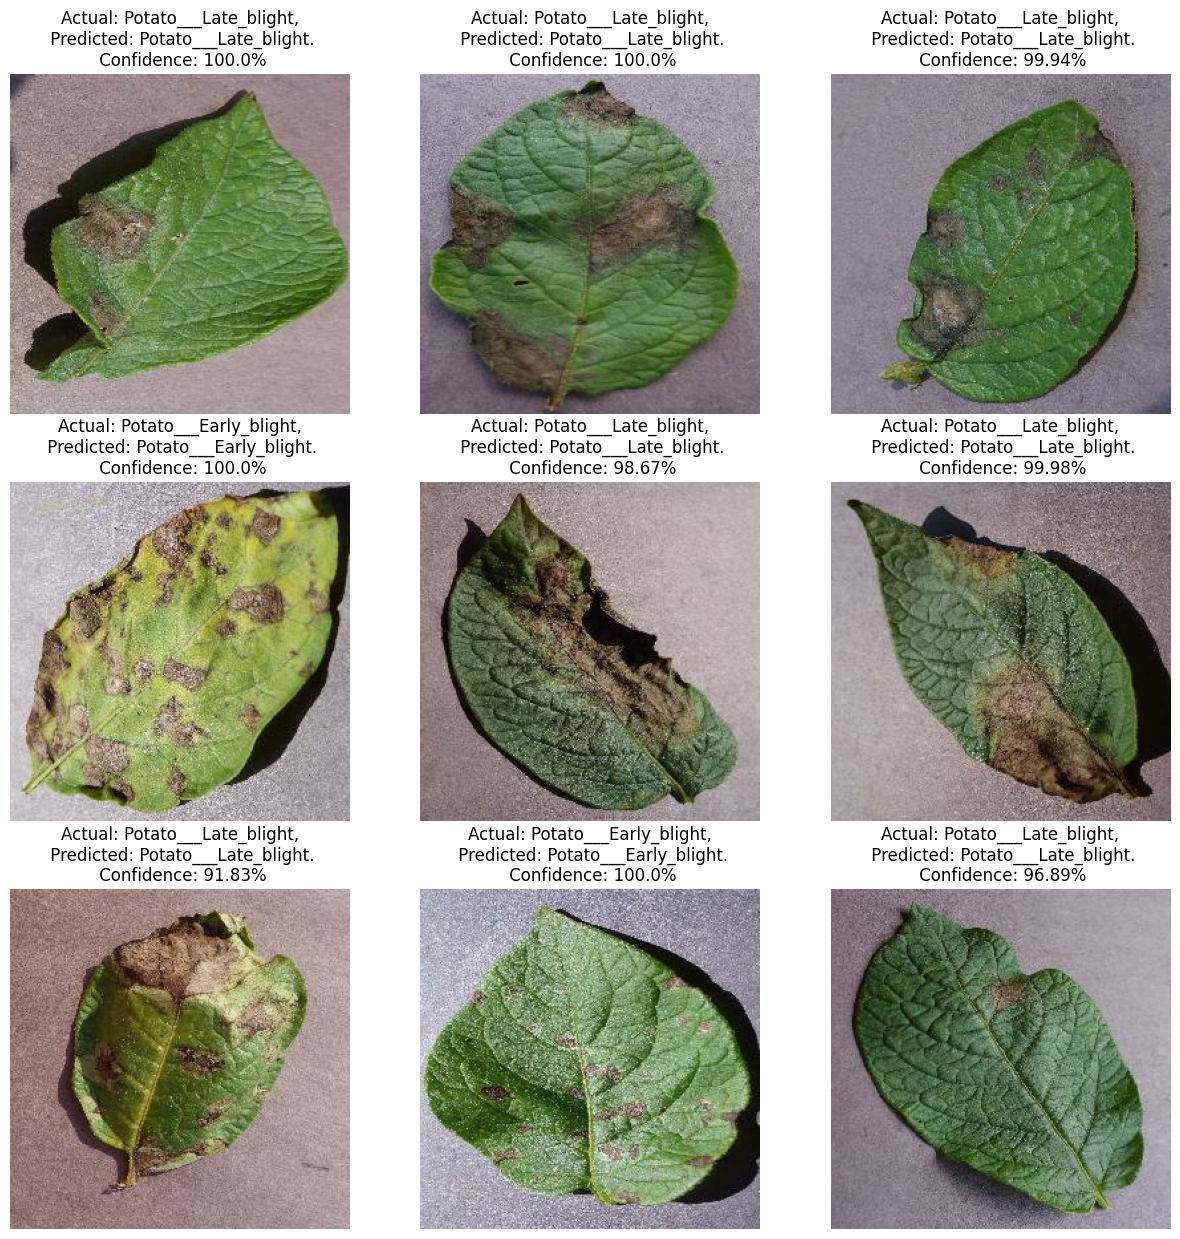

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
model.export(r'D:\Potato Disease project\Model_save')

INFO:tensorflow:Assets written to: D:\Potato Disease project\Model_save\assets


INFO:tensorflow:Assets written to: D:\Potato Disease project\Model_save\assets


Saved artifact at 'D:\Potato Disease project\Model_save'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  3116284612048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116284612432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486495120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486496464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486495312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486497232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486496848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486497616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486495888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486498000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  311648649665

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model = model)

In [ ]:
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6u59wr3d\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6u59wr3d\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmp6u59wr3d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(32, 3), dtype=tf.float32, name=None)
Captures:
  3116486495120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486496464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486495312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486497232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486496848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486497616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486495888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486498000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486496656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486498576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3116486497

In [ ]:
open("degree.tflite","wb").write(tfmodel)

740728